/var/folders/yj/6cwm4qyj6qz3dkx7t8z3qxc40000gn/T/ipykernel_83284/2009919062.py:21: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(rpm, torque, degree)


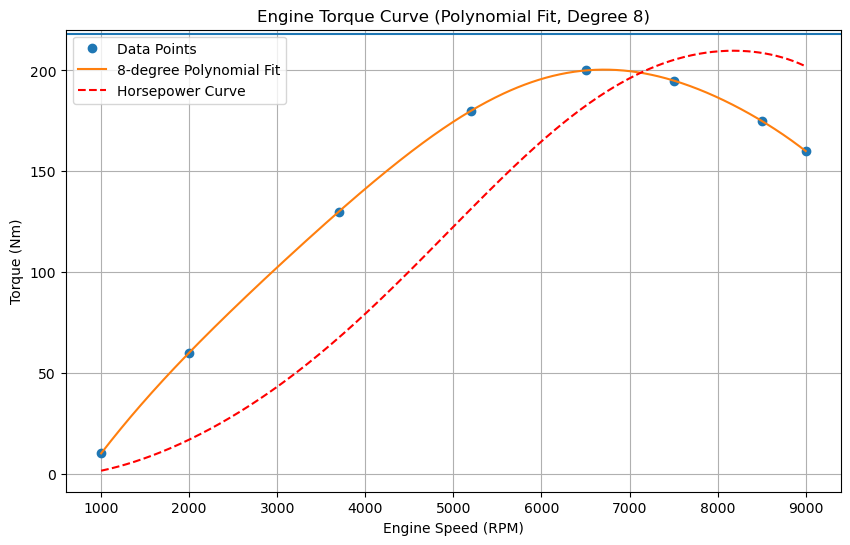

Coefficients of the fitted polynomial:
[-5.44882202e-29  1.21656962e-24 -4.94491740e-21 -5.52549249e-17
  3.50034533e-13  8.83666149e-10 -1.24244875e-05  7.77211040e-02
 -5.64712794e+01]
"coefficient_0": -56.47127943510149,
"coefficient_1": 0.0777211039758718,
"coefficient_2": -1.2424487461334542e-05,
"coefficient_3": 8.836661488753308e-10,
"coefficient_4": 3.5003453258117626e-13,
"coefficient_5": -5.5254924886036555e-17,
"coefficient_6": -4.944917402131159e-21,
"coefficient_7": 1.216569616156245e-24,
"coefficient_8": -5.44882202407593e-29,


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
points = np.array([
    [1000, 10],
    [2000, 60],
    [3700, 130],
    [5200, 180],
    [6500, 200],
    [7500, 195],
    [8500, 175],
    [9000, 160]
])
maxTq = 218
rpm = points[:, 0]
torque = points[:, 1]

# Fit a 7th-degree polynomial to the data
degree = 8
coefficients = np.polyfit(rpm, torque, degree)

# Create the polynomial function using the coefficients
polynomial = np.poly1d(coefficients)

# Generate smooth RPM values for plotting the polynomial
rpm_smooth = np.linspace(rpm.min(), rpm.max(), 500)
torque_smooth = polynomial(rpm_smooth)

# Plot the data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(rpm, torque, 'o', label="Data Points")
plt.plot(rpm_smooth, torque_smooth, '-', label=f"{degree}-degree Polynomial Fit")
hp_smooth = (torque_smooth * rpm_smooth) / 7127
plt.plot(rpm_smooth, hp_smooth, '--', label="Horsepower Curve", color="red")

plt.axhline(maxTq)  # Assuming the maximum torque is the maximum value in the dataset
plt.xlabel("Engine Speed (RPM)")
plt.ylabel("Torque (Nm)")
plt.title(f"Engine Torque Curve (Polynomial Fit, Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial coefficients
print("Coefficients of the fitted polynomial:")
print(coefficients)

for i in range(len(coefficients)):
    print(f'"coefficient_{i}": {coefficients[len(coefficients)-i-1]},')
